In [1]:
!pip install -q git+https://github.com/huggingface/transformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip install -q git+https://github.com/huggingface/datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip install -q git+https://github.com/huggingface/accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
!pip install -q ipython-autotime

In [5]:
%load_ext autotime

time: 288 µs (started: 2023-09-02 12:45:25 +00:00)


In [6]:
!pip install -q evaluate

time: 4.72 s (started: 2023-09-02 12:45:25 +00:00)


# **Import Necessary Libraries**

In [7]:
# Importing system-specific parameters and functions
import sys

# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Transformers and Tokenizers
import transformers
from transformers import DataCollatorForSeq2Seq, MBart50Tokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer, set_seed

# Datasets
import datasets
from datasets import Dataset, DatasetDict

# Custom evaluation module
import evaluate

# PyTorch
import torch

# Progress bar
from tqdm import tqdm



time: 7.84 s (started: 2023-09-02 12:45:30 +00:00)


In [8]:
set_seed(42)

time: 4.21 ms (started: 2023-09-02 12:45:38 +00:00)


In [9]:
library_versions = {
    "Python": sys.version.split()[0],
    "NumPy": np.__version__,
    "Pandas": pd.__version__,
    "Datasets": datasets.__version__,
    "Transformers": transformers.__version__,
    "Torch": torch.__version__,
    "Evaluate": evaluate.__version__,
}

for name, version in library_versions.items():
    print(name.rjust(15), ":", version)

         Python : 3.10.12
          NumPy : 1.23.5
         Pandas : 1.5.3
       Datasets : 2.14.4.dev0
   Transformers : 4.33.0.dev0
          Torch : 2.0.1+cu118
       Evaluate : 0.4.0
time: 939 µs (started: 2023-09-02 12:45:38 +00:00)


In [10]:
!pip install -q opendatasets

time: 4.63 s (started: 2023-09-02 12:45:38 +00:00)


In [11]:
import opendatasets as od

time: 26.5 ms (started: 2023-09-02 12:45:42 +00:00)


In [12]:
od.download('https://www.kaggle.com/datasets/hgultekin/paralel-translation-corpus-in-22-languages')



Skipping, found downloaded files in "./paralel-translation-corpus-in-22-languages" (use force=True to force download)
time: 1.26 ms (started: 2023-09-02 12:45:42 +00:00)


In [13]:
data = pd.read_csv('/content/paralel-translation-corpus-in-22-languages/EN-ES/EN-ES.txt', delimiter='\t', engine='c', header=None)

time: 31.3 s (started: 2023-09-02 12:45:42 +00:00)


Note: engine='c': Use the C (faster) engine to read the CSV

In [14]:
# Remove duplicates
data.drop_duplicates(inplace=True)

time: 13.4 s (started: 2023-09-02 12:46:14 +00:00)


In [15]:
# Remove NaN values
data.dropna(inplace=True)

time: 6.32 s (started: 2023-09-02 12:46:27 +00:00)


In [16]:
data

,0,1,2,3,4,5,6,7
0,Commission Regulation (EC) No 1788/2004,Reglamento (CE) no 1788/2004 de la Comisión,COMMON ATTRIBUTES -- Txt::Doc. No.: 32004R1788,TMX Memory,D:\DGT Translation Memory,EN-ES.tmx,1,Translated
1,of 15 October 2004,de 15 de octubre de 2004,COMMON ATTRIBUTES -- Txt::Doc. No.: 32004R1788,TMX Memory,D:\DGT Translation Memory,EN-ES.tmx,2,Translated
2,fixing the minimum selling prices for butter f...,por el que se fijan los precios mínimos de ven...,COMMON ATTRIBUTES -- Txt::Doc. No.: 32004R1788,TMX Memory,D:\DGT Translation Memory,EN-ES.tmx,3,Translated
3,"THE COMMISSION OF THE EUROPEAN COMMUNITIES,","LA COMISIÓN DE LAS COMUNIDADES EUROPEAS,",COMMON ATTRIBUTES -- Txt::Doc. No.: 32004R1788,TMX Memory,D:\DGT Translation Memory,EN-ES.tmx,4,Translated
4,Having regard to the Treaty establishing the E...,Visto el Tratado constitutivo de la Comunidad ...,COMMON ATTRIBUTES -- Txt::Doc. No.: 32004R1788,TMX Memory,D:\DGT Translation Memory,EN-ES.tmx,5,Translated
...,...,...,...,...,...,...,...,...
5696845,Third country code [1],Código país tercero [1],COMMON ATTRIBUTES -- Txt::Doc. No.: 32004R1787,TMX Memory,D:\DGT Translation Memory,EN-ES.tmx,5696846,Translated
5696846,Standard import value,Valor global de importación,COMMON ATTRIBUTES -- Txt::Doc. No.: 32004R1787,TMX Memory,D:\DGT Translation Memory,EN-ES.tmx,5696847,Translated
5696847,Country nomenclature as fixed by Commission Re...,Nomenclatura de países fijada por el Reglament...,COMMON ATTRIBUTES -- Txt::Doc. No.: 32004R1787,TMX Memory,D:\DGT Translation Memory,EN-ES.tmx,5696848,Translated
5696848,Code ‘999’ stands for ‘of other origin’.,El código «999» significa «otros orígenes».,COMMON ATTRIBUTES -- Txt::Doc. No.: 32004R1787,TMX Memory,D:\DGT Translation Memory,EN-ES.tmx,5696849,Translated


time: 14 ms (started: 2023-09-02 12:46:34 +00:00)


In [17]:
# Strip whitespaces from the 'english' and 'spanish' columns
data[0] = data[0].str.strip()
data[1] = data[1].str.strip()


time: 4.37 s (started: 2023-09-02 12:46:34 +00:00)


In [18]:
# Drop unnecessary columns
data.drop(columns=[2, 3, 4, 5, 6, 7], inplace=True)



time: 326 ms (started: 2023-09-02 12:46:38 +00:00)


In [19]:
# Rename columns to be more descriptive
data.rename(columns={1: 'spanish', 0: 'english'}, inplace=True)

time: 1.27 ms (started: 2023-09-02 12:46:39 +00:00)


Since both English and Spanish languages uses same numeric system hence we can drop numbers for translation task!

In [20]:
# Remove rows in the 'english' column that contain numbers
data = data[~data['english'].str.contains('\\d', regex=True)]




time: 6.81 s (started: 2023-09-02 12:46:39 +00:00)


In [21]:
# Reset index after dropping rows
data.reset_index(inplace=True, drop=True)

time: 570 µs (started: 2023-09-02 12:46:45 +00:00)


In [22]:
data

,english,spanish
0,"THE COMMISSION OF THE EUROPEAN COMMUNITIES,","LA COMISIÓN DE LAS COMUNIDADES EUROPEAS,"
1,Having regard to the Treaty establishing the E...,Visto el Tratado constitutivo de la Comunidad ...
2,Whereas:,Considerando lo siguiente:
3,The amount(s) of the processing securities mus...,El o los importes de las garantías de transfor...
4,The measures provided for in this Regulation a...,Las medidas previstas en el presente Reglament...
...,...,...
3316272,For the Commission,Por la Comisión
3316273,Agriculture Director-General,Director General de Agricultura
3316274,ANNEX,ANEXO
3316275,CN code,Código NC


time: 348 ms (started: 2023-09-02 12:46:45 +00:00)


# **Visulaizing Length of English Entries**

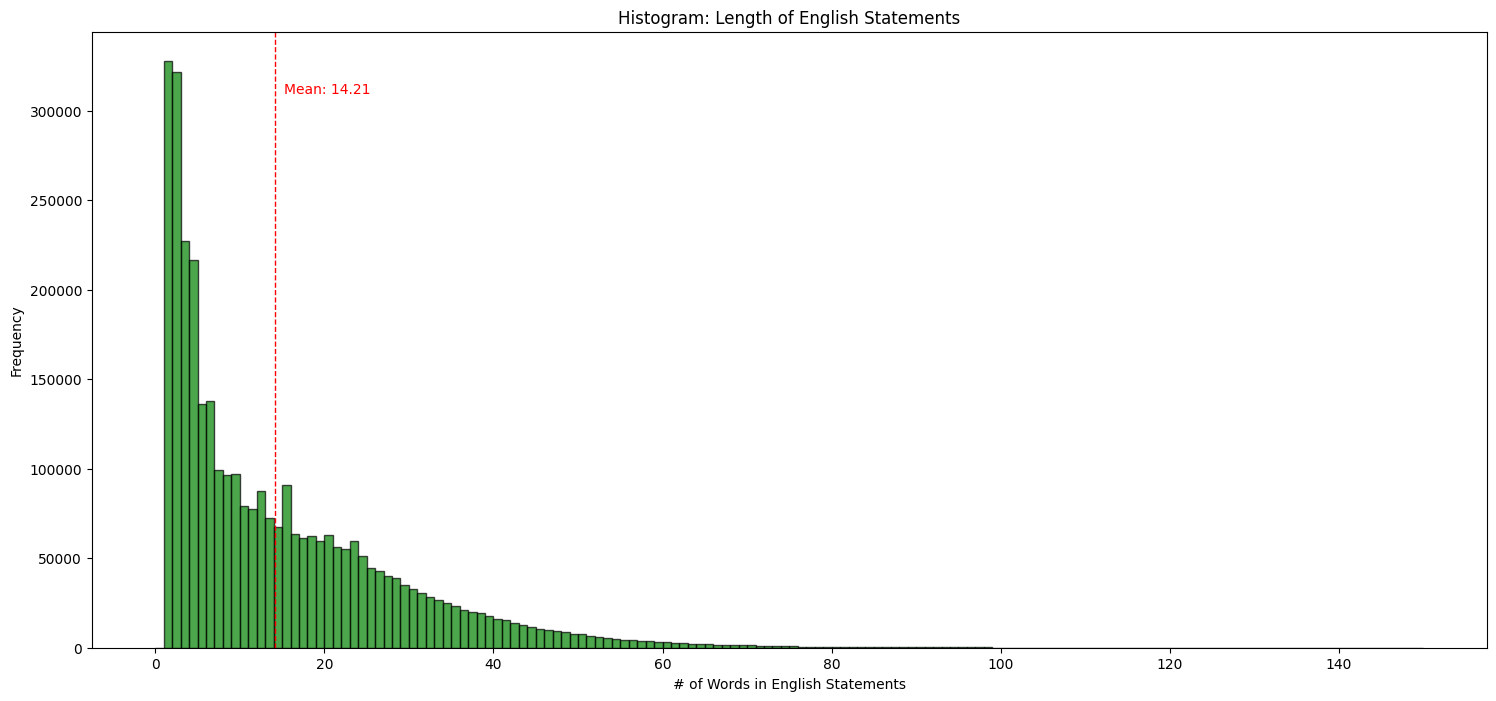

time: 4.76 s (started: 2023-09-02 12:46:46 +00:00)


In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# If you're working with a slice, it might be a good idea to copy it to avoid the SettingWithCopyWarning
# But understand your data before doing this
data = data.copy()

# Add a column to store the length of each English sentence in terms of word count
data['english_length'] = data['english'].apply(lambda x: len(x.split()))

# Number of bins
n_bin = 150

# Mean length
mean_length = data['english_length'].mean()

# Initialize plot settings
plt.figure(figsize=(18, 8))

# Plot histogram
plt.hist(data['english_length'], bins=n_bin, range=(0, n_bin), color='green', alpha=0.7, edgecolor='black')

# Add mean line
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_length + 1, plt.ylim()[1]*0.9, f'Mean: {mean_length:.2f}', color='red')

# Add title and labels
plt.title('Histogram: Length of English Statements')
plt.xlabel('# of Words in English Statements')
plt.ylabel('Frequency')

# Show plot
plt.show()




In [24]:
# Print max, min, and mean length
print(f"The maximum length of English text (in words) is {data['english_length'].max()} words.")
print(f"The minimum length of English text (in words) is {data['english_length'].min()} words.")
print(f"The average length of English text (in words) is {data['english_length'].mean():.2f} words.")


The maximum length of English text (in words) is 291 words.
The minimum length of English text (in words) is 1 words.
The average length of English text (in words) is 14.21 words.
time: 10.7 ms (started: 2023-09-02 12:46:51 +00:00)


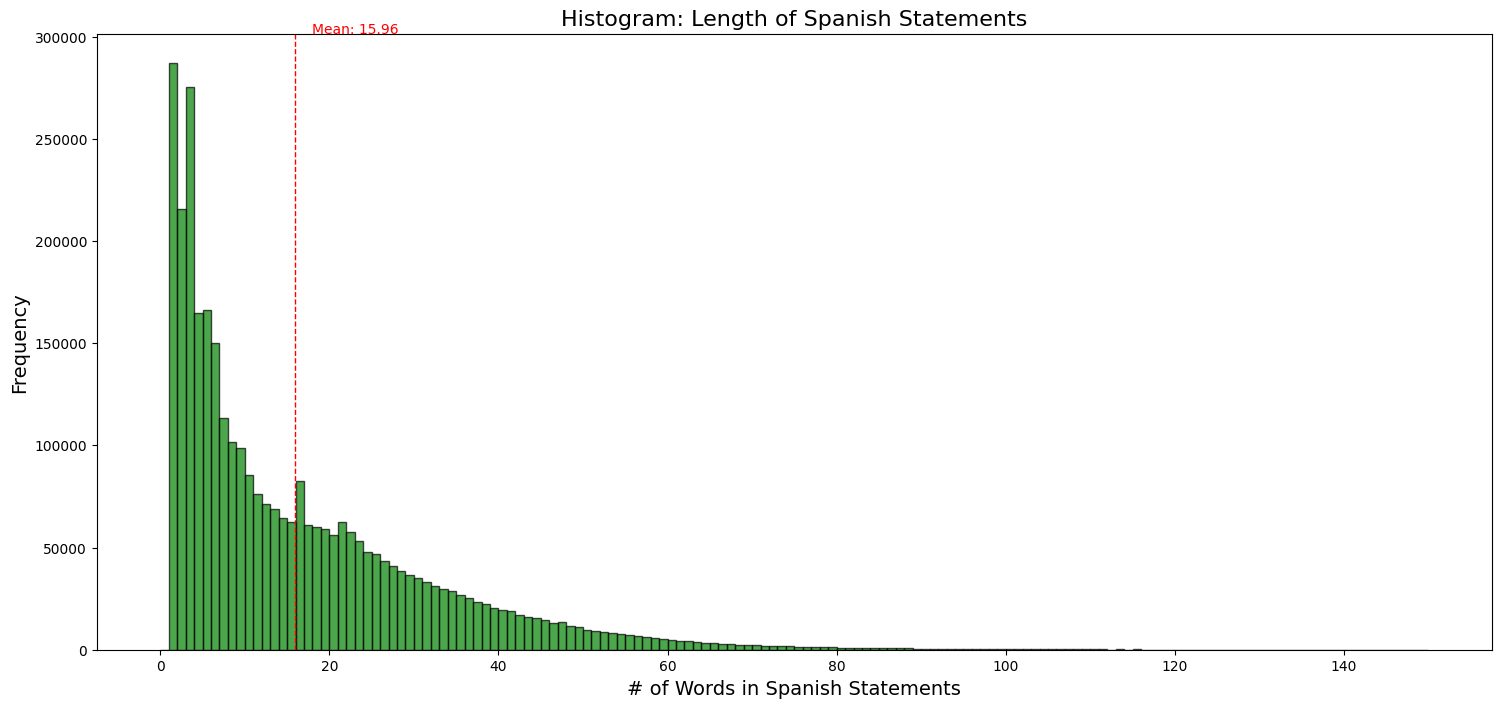

time: 19 s (started: 2023-09-02 12:46:51 +00:00)


In [25]:
# Calculate the length of Spanish entries and store in a new column
data['spanish_length'] = data['spanish'].str.split().str.len()

# Number of bins for histogram
n_bin = 150

# Calculate the mean length of Spanish entries
mean_length = data['spanish_length'].mean()

# Plot the histogram
plt.figure(figsize=(18, 8))
plt.hist(data['spanish_length'], bins=n_bin, range=(0, n_bin), color='green', alpha=0.7, edgecolor='black')

# Add title and labels
plt.title('Histogram: Length of Spanish Statements', fontsize=16)
plt.xlabel('# of Words in Spanish Statements', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a vertical line for the mean
plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=1)
plt.text(mean_length+2, plt.ylim()[1]-50, f'Mean: {mean_length:.2f}', color='r')

# Show the plot
plt.show()


In [26]:
# Print max, min, and mean length for Spanish text
print(f"The maximum length of Spanish text (in words) is {data['spanish_length'].max()} words.")
print(f"The minimum length of Spanish text (in words) is {data['spanish_length'].min()} words.")
print(f"The average length of Spanish text (in words) is {data['spanish_length'].mean():.2f} words.")


The maximum length of Spanish text (in words) is 330 words.
The minimum length of Spanish text (in words) is 1 words.
The average length of Spanish text (in words) is 15.96 words.
time: 9.88 ms (started: 2023-09-02 12:47:10 +00:00)


In [27]:
upper_limit_english = data['english_length'].quantile(0.95)
lower_limit_english = data['english_length'].quantile(0.05)

upper_limit_spanish = data['spanish_length'].quantile(0.95)
lower_limit_spanish = data['spanish_length'].quantile(0.05)

data = data[(data['english_length'] <= upper_limit_english) & (data['english_length'] >= lower_limit_english)]
data = data[(data['spanish_length'] <= upper_limit_spanish) & (data['spanish_length'] >= lower_limit_spanish)]


time: 660 ms (started: 2023-09-02 12:47:10 +00:00)


In [28]:
data

,english,spanish,english_length,spanish_length
0,"THE COMMISSION OF THE EUROPEAN COMMUNITIES,","LA COMISIÓN DE LAS COMUNIDADES EUROPEAS,",6,6
1,Having regard to the Treaty establishing the E...,Visto el Tratado constitutivo de la Comunidad ...,9,8
2,Whereas:,Considerando lo siguiente:,1,3
3,The amount(s) of the processing securities mus...,El o los importes de las garantías de transfor...,10,17
4,The measures provided for in this Regulation a...,Las medidas previstas en el presente Reglament...,22,23
...,...,...,...,...
3316272,For the Commission,Por la Comisión,3,3
3316273,Agriculture Director-General,Director General de Agricultura,2,4
3316274,ANNEX,ANEXO,1,1
3316275,CN code,Código NC,2,2


time: 7.69 ms (started: 2023-09-02 12:47:10 +00:00)


In [29]:
data.reset_index(drop=True, inplace=True)

time: 328 µs (started: 2023-09-02 12:47:10 +00:00)


In [30]:
data = data[["english", "spanish"]]

time: 98.6 ms (started: 2023-09-02 12:47:10 +00:00)


In [31]:
data

,english,spanish
0,"THE COMMISSION OF THE EUROPEAN COMMUNITIES,","LA COMISIÓN DE LAS COMUNIDADES EUROPEAS,"
1,Having regard to the Treaty establishing the E...,Visto el Tratado constitutivo de la Comunidad ...
2,Whereas:,Considerando lo siguiente:
3,The amount(s) of the processing securities mus...,El o los importes de las garantías de transfor...
4,The measures provided for in this Regulation a...,Las medidas previstas en el presente Reglament...
...,...,...
3124607,For the Commission,Por la Comisión
3124608,Agriculture Director-General,Director General de Agricultura
3124609,ANNEX,ANEXO
3124610,CN code,Código NC


time: 6.57 ms (started: 2023-09-02 12:47:10 +00:00)


In [32]:
# Randomly Sample 45,000 Samples (Due to Hardware Limitations)
data = data.sample(n=45000, random_state=42, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   english  45000 non-null  object
 1   spanish  45000 non-null  object
dtypes: object(2)
memory usage: 703.2+ KB
time: 134 ms (started: 2023-09-02 12:47:10 +00:00)


In [33]:
data.rename(columns={'english': 'en', 'spanish': 'es'}, inplace=True)
df = data.copy()
df['translation'] = df[['en', 'es']].apply(dict, axis=1)
df = df[['translation']]
df.head()


,translation
0,{'en': 'The hours spent in training either in ...
1,"{'en': 'protect national security;', 'es': 'pr..."
2,{'en': 'the demarcation and laying-out of area...
3,{'en': 'The certificates portfolio manager (re...
4,"{'en': 'Since the scope, essential requirement..."


time: 459 ms (started: 2023-09-02 12:47:11 +00:00)


# **Convert to Dataset Format & Split into Train, Test and Eval**

In [34]:
dataset = Dataset.from_pandas(df)

train_test_valid = dataset.train_test_split(train_size=0.80)
test_eval = train_test_valid['test'].train_test_split(train_size=0.50)

ds = DatasetDict({
    'train' : train_test_valid['train'],
    'test' : test_eval['train'],
    'eval' : test_eval['test'],
})

print("Training Dataset Shape:", ds['train'].shape)
print("Testing Dataset Shape:", ds['test'].shape)
print("Evaluation Dataset Shape:", ds['eval'].shape)
ds['train'][25]

Training Dataset Shape: (36000, 1)
Testing Dataset Shape: (4500, 1)
Evaluation Dataset Shape: (4500, 1)


{'translation': {'en': 'Warsaw’', 'es': 'Varsovia»'}}

time: 106 ms (started: 2023-09-02 12:47:11 +00:00)


In [35]:
NUM_OF_EPOCHS = 4

BATCH_SIZE = 8
LEARNING_RATE = 1e-5

SOURCE_LANGUAGE = "en"
TARGET_LANGUAGE = "es"

# Set the upper_limit to the maximum value between upper_limit_english and upper_limit_spanish
upper_limit = max(upper_limit_english, upper_limit_spanish)

# Cap the upper_limit to be less than or equal to 512
upper_limit = min(upper_limit, 512)

MAX_LENGTH = int(upper_limit)
MODEL_CKPT = "facebook/mbart-large-50"

DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


time: 24 ms (started: 2023-09-02 12:47:11 +00:00)


# **Create Tokenizer**

In [36]:
!pip install -q sentencepiece

time: 4.52 s (started: 2023-09-02 12:47:11 +00:00)


In [37]:
tokenizer = MBart50Tokenizer.from_pretrained(MODEL_CKPT)
tokenizer.src_lang, tokenizer.tgt_lang = "en_XX", "es_XX"


time: 4.58 s (started: 2023-09-02 12:47:16 +00:00)


# **Create Preprocessing Function**

In [38]:
def tokenizing_function(examples):
    inputs = [ex[SOURCE_LANGUAGE] for ex in examples['translation']]
    targets = [ex[TARGET_LANGUAGE] for ex in examples['translation']]
    model_inputs = tokenizer(inputs, text_target=targets, max_length=MAX_LENGTH, truncation=True)
    return model_inputs


time: 581 µs (started: 2023-09-02 12:47:20 +00:00)


# **Apply Preprocessing Function to Dataset**

In [39]:
encoded_ds = ds.map(tokenizing_function, batched=True, load_from_cache_file=False)

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4500 [00:00<?, ? examples/s]

Map:   0%|          | 0/4500 [00:00<?, ? examples/s]

time: 14.4 s (started: 2023-09-02 12:47:20 +00:00)


In [40]:
print(encoded_ds['train'].shape)
print(encoded_ds['test'].shape)
print(encoded_ds['eval'].shape)

(36000, 4)
(4500, 4)
(4500, 4)
time: 719 µs (started: 2023-09-02 12:47:35 +00:00)


# **Instantiate Model**

In [41]:
model = (AutoModelForSeq2SeqLM.from_pretrained(MODEL_CKPT, num_labels=2)).to(DEVICE)

time: 27.3 s (started: 2023-09-02 12:47:35 +00:00)


# **Instantiate Data Collator**

In [42]:
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

time: 410 µs (started: 2023-09-02 12:48:02 +00:00)


# **Compute Metrics**

In [43]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 2.5 MB/s eta 0:00:00
time: 5.23 s (started: 2023-09-02 12:48:02 +00:00)


In [44]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=46f1a8e024a3d706a26e83dfe3e5792ce441fd1e566321709ecf5fe4f0e52145
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
time: 5.93 s (started: 2023-09-02 12:48:07 +00:00)


In [45]:
import importlib_metadata


time: 12.6 ms (started: 2023-09-02 12:48:13 +00:00)


In [46]:
bleu_metric = evaluate.load("sacrebleu")
rouge_metric = evaluate.load("rouge")


time: 5.13 s (started: 2023-09-02 12:48:13 +00:00)


In [47]:
def compute_metrics(eval_preds):
    # Extract predictions and labels
    preds, labels = eval_preds

    # In case predictions are a tuple, take the first element
    if isinstance(preds, tuple):
        preds = preds[0]

    # Decode predictions to text
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    # Handle padded labels
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

    # Decode labels to text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Remove leading/trailing white spaces from predictions and labels
    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [[label.strip()] for label in decoded_labels]

    # Compute BLEU, ROUGE, and METEOR scores
    bleu_results = bleu_metric.compute(predictions=decoded_preds, references=decoded_labels)
    rouge_results = rouge_metric.compute(predictions=decoded_preds, references=decoded_labels)
    #meteor_results = meteor_metric.compute(predictions=decoded_preds, references=decoded_labels)

    # Return metrics
    return {
        "bleu": bleu_results["score"],
        "rouge": rouge_results,
        #"meteor": meteor_results
    }


time: 699 µs (started: 2023-09-02 12:48:18 +00:00)


# **Instantiate Training Arguments**

In [48]:
WEIGHT_DECAY=1e-3
MODEL_NAME = f"{MODEL_CKPT.split('/')[-1]}-en-es-translation-lr-{LEARNING_RATE}-weight-decay-{WEIGHT_DECAY}"

args = Seq2SeqTrainingArguments(output_dir=MODEL_NAME,
                                per_device_train_batch_size=BATCH_SIZE,
                                per_device_eval_batch_size=BATCH_SIZE,
                                evaluation_strategy="epoch",
                                logging_strategy="epoch",
                                learning_rate=LEARNING_RATE,
                                report_to='all',
                                weight_decay=WEIGHT_DECAY,
                                save_total_limit=2,
                                disable_tqdm=False,
                                num_train_epochs=NUM_OF_EPOCHS,
                                predict_with_generate=True,
                                push_to_hub=True)

time: 5.06 ms (started: 2023-09-02 12:48:18 +00:00)


# **Instantiate Trainer**

In [49]:
from huggingface_hub import notebook_login
notebook_login()

time: 18.2 ms (started: 2023-09-02 12:48:18 +00:00)


In [51]:
trainer = Seq2SeqTrainer(model=model,
                         args=args,
                         train_dataset=encoded_ds['train'],
                         eval_dataset=encoded_ds['eval'],
                         tokenizer=tokenizer,
                         data_collator=data_collator,
                         compute_metrics=compute_metrics)

time: 585 ms (started: 2023-09-02 12:48:56 +00:00)


# **Train Model**

In [52]:
trainer.train()

Epoch,Training Loss,Validation Loss,Bleu,Rouge
1,1.462700,1.025460,42.187990,"{'rouge1': 0.6725633216905762, 'rouge2': 0.48605402524493657, 'rougeL': 0.6498853764470456, 'rougeLsum': 0.6501981166312041}"
2,0.887800,0.957179,44.173415,"{'rouge1': 0.6912686406245903, 'rouge2': 0.5093695171345348, 'rougeL': 0.6701896043455414, 'rougeLsum': 0.6703473419504804}"
3,0.712500,0.941438,44.870874,"{'rouge1': 0.7051197958532004, 'rouge2': 0.5210482863677958, 'rougeL': 0.6843075431636916, 'rougeLsum': 0.6846265298079588}"


Trainer is attempting to log a value of "{'rouge1': 0.6725633216905762, 'rouge2': 0.48605402524493657, 'rougeL': 0.6498853764470456, 'rougeLsum': 0.6501981166312041}" of type <class 'dict'> for key "eval/rouge" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'rouge1': 0.6912686406245903, 'rouge2': 0.5093695171345348, 'rougeL': 0.6701896043455414, 'rougeLsum': 0.6703473419504804}" of type <class 'dict'> for key "eval/rouge" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'rouge1': 0.7051197958532004, 'rouge2': 0.5210482863677958, 'rougeL': 0.6843075431636916, 'rougeLsum': 0.6846265298079588}" of type <class 'dict'> for key "eval/rouge" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Epoch,Training Loss,Validation Loss,Bleu,Rouge
1,1.462700,1.025460,42.187990,"{'rouge1': 0.6725633216905762, 'rouge2': 0.48605402524493657, 'rougeL': 0.6498853764470456, 'rougeLsum': 0.6501981166312041}"
2,0.887800,0.957179,44.173415,"{'rouge1': 0.6912686406245903, 'rouge2': 0.5093695171345348, 'rougeL': 0.6701896043455414, 'rougeLsum': 0.6703473419504804}"
3,0.712500,0.941438,44.870874,"{'rouge1': 0.7051197958532004, 'rouge2': 0.5210482863677958, 'rougeL': 0.6843075431636916, 'rougeLsum': 0.6846265298079588}"
4,0.609200,0.954912,45.082083,"{'rouge1': 0.7047932899349161, 'rouge2': 0.523739339466653, 'rougeL': 0.6840127607742443, 'rougeLsum': 0.684202100852132}"


Trainer is attempting to log a value of "{'rouge1': 0.7047932899349161, 'rouge2': 0.523739339466653, 'rougeL': 0.6840127607742443, 'rougeLsum': 0.684202100852132}" of type <class 'dict'> for key "eval/rouge" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


TrainOutput(global_step=18000, training_loss=0.9180649007161459, metrics={'train_runtime': 7027.7791, 'train_samples_per_second': 20.49, 'train_steps_per_second': 2.561, 'total_flos': 1.2199315246153728e+16, 'train_loss': 0.9180649007161459, 'epoch': 4.0})

time: 1h 57min 8s (started: 2023-09-02 12:49:03 +00:00)


# **Evaluate Model**

In [53]:
trainer.evaluate(max_length=MAX_LENGTH)

Trainer is attempting to log a value of "{'rouge1': 0.7049318825090395, 'rouge2': 0.5238048751750992, 'rougeL': 0.684187379601513, 'rougeLsum': 0.6843574853855577}" of type <class 'dict'> for key "eval/rouge" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


{'eval_loss': 0.9549115896224976,
 'eval_bleu': 45.03072313666256,
 'eval_rouge': {'rouge1': 0.7049318825090395,
  'rouge2': 0.5238048751750992,
  'rougeL': 0.684187379601513,
  'rougeLsum': 0.6843574853855577},
 'eval_runtime': 633.7285,
 'eval_samples_per_second': 7.101,
 'eval_steps_per_second': 0.888,
 'epoch': 4.0}

time: 10min 33s (started: 2023-09-02 14:49:20 +00:00)


# **Push Model to HF Hub**

In [54]:
trainer.push_to_hub(tags="translation")

pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

'https://huggingface.co/DrishtiSharma/mbart-large-50-en-es-translation-lr-1e-05-weight-decay-0.001/tree/main/'

time: 4min 14s (started: 2023-09-02 14:59:54 +00:00)


# **Inference**

In [56]:
from transformers import MBart50Tokenizer, MBartForConditionalGeneration

# Load trained model and tokenizer
model = MBartForConditionalGeneration.from_pretrained('DrishtiSharma/mbart-large-50-en-es-translation-lr-1e-05-weight-decay-0.001')
tokenizer = MBart50Tokenizer.from_pretrained('DrishtiSharma/mbart-large-50-en-es-translation-lr-1e-05-weight-decay-0.001')

time: 3min (started: 2023-09-02 15:05:20 +00:00)


In [57]:
# Set language codes
tokenizer.src_lang = "en_XX"
tokenizer.tgt_lang = "es_XX"



time: 577 µs (started: 2023-09-02 15:08:20 +00:00)


In [58]:
# Text to translate
text_to_translate = "Hello, how are you?"

# Tokenize input text
inputs = tokenizer([text_to_translate], max_length=128, return_tensors="pt")



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


time: 2.12 ms (started: 2023-09-02 15:08:20 +00:00)


# **End-to-end time**

In [59]:
# Generate translation using model
output_ids = model.generate(**inputs)

# Decode the output to text
translated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Print translated text
print(translated_text)

Buenas tardes, ¿cómo está?
time: 1.5 s (started: 2023-09-02 15:08:20 +00:00)
